#  Self-Study 4: Coupled Dynamics and Stability

In this self-study, we will explore the concepts of stability and coupled dynamics. A key part of our approach will involve using symbolic mathematics.

If you are not familiar with `sympy`, take a look at the notebook `sympy_basics.ipynb` for a quick introduction.
This notebook also contains examples on how to use `sympy` to compute the Jacobian matrix of a system of differential equations.

## Section 1: Fixed Points and Phase Portrait

In this section we will be looking at the dynamics of a system of ODEs with **two coupled** variables, $x$ and $y$.

$$
\frac{dx}{dt} = \alpha x - \beta x^2 - \gamma xy
$$
$$
\frac{dy}{dt} = \delta y - y^2 - xy
$$

You may recognize this as the competition dynamics we saw in Lecture 4.
The parameters $\alpha, \beta, \gamma, \delta$ are all positive constants.


### Task 1: Find the fixed points analytically (with `sympy`)


The fixed points are the points where the derivatives are zero.
In other words, if the system starts at such a point, it will remain fixed there unless perturbed.

In [2]:
from sympy import symbols, Eq, solve

# Declare variables, hint: use symbols()
x, y = symbols('x y')

alpha, beta, gamma, delta = symbols('alpha beta gamma delta')

# Define the equations for dx/dt and dy/dt

# Set up equations for fixed points
eq1 = alpha*x - beta*x**2 - gamma*x*y
eq2 = delta*y - y**2 - x*y

# Solve for fixed points
fixed_points = solve((Eq(eq1, 0), Eq(eq2, 0)), (x, y))
print(fixed_points)

[(0, 0), (0, delta), (alpha/beta, 0), ((alpha - delta*gamma)/(beta - gamma), (-alpha + beta*delta)/(beta - gamma))]


### Task 2: Plot the phase portrait

The phase portrait is a plot of the trajectories of the system in the $x-y$ plane. It is useful to visualise the dynamics of the system.


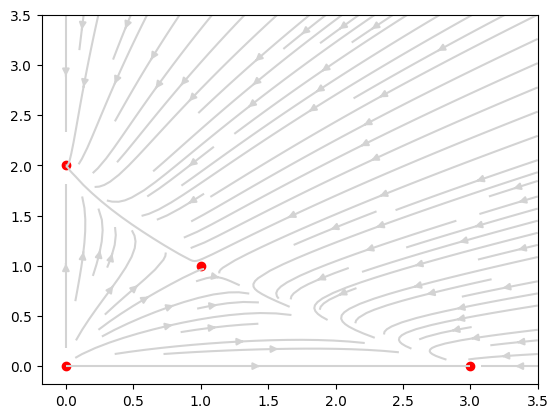

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find numerical fixed points for the symbolic solutions you found earlier.
# You can start with these values (Slide 11), but feel free to change them to see what happens.

alpha_val = 3
beta_val = 1
gamma_val = 2
delta_val = 2

fixed_points_val = []
for x, y in fixed_points:
    # **Hint:** Look at the sympy documentation for the `subs` method
    
    x_temp = x.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val})
    y_temp = y.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val})
    fixed_points_val.append((float(x_temp), float(y_temp)))
    pass


# Step 2: Generate streamplot of the vector field defined by the equations above.
# **Hint:** Look at the matplotlib documentation for the `streamplot` function.
X, Y = np.meshgrid(np.linspace(0, 3.5, 40), np.linspace(0, 3.5, 40))

# compute the vector field at the meshgrid points
U = alpha_val*X - beta_val*X**2 - gamma_val*X*Y
V = delta_val*Y - Y**2 - X*Y

# use plt.streamplot to plot
plt.streamplot(X, Y, U, V, color='lightgray')

# Step 3: Overlay fixed points onto the streamplot
plt.scatter(*zip(*fixed_points_val), color='red')


## Section 2: Stability of Fixed Points

Using the same system as above, investigate the stability of the fixed points.

1. Find the fixed points of the system (i.e., Task 1 above).
1. Define the Jacobian matrix of the system.
2. Find its eigenvalues at each fixed point.
3. Determine the stability (see Lecture 4, Slide 12).

The Jacobian matrix is given by:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}
$$


In [8]:
# 1. Find Fixed Points (Same system as above)
x, y = symbols('x y')

# this time we will use explicit values for the parameters
alpha, beta, gamma, delta = 3, 1, 2, 2

f = alpha*x - beta*x**2 - gamma*x*y
g = delta*y - y**2 - x*y

fixed_points = solve((Eq(f, 0), Eq(g, 0)), (x, y))

In [16]:
# 2. Create the Jacobian Matrix
# Hint: use Matrix and diff from sympy to compute the Jacobian matrix
from sympy import diff, Matrix


# Define the Jacobian matrix
J = Matrix([[diff(f, x), diff(f, y)],
            [diff(g, x), diff(g, y)]])
print(J)

Matrix([[-2*x - 2*y + 3, -2*x], [-y, -x - 2*y + 2]])


In [18]:
# 3. Compute eigenvalues for each fixed point 
eigenvalues = J.eigenvals()
print(eigenvalues)
print(len(eigenvalues))  # should be 2 eigenvalues for a 2x2 matrix

{-3*x/2 - 2*y - sqrt(x**2 + 8*x*y - 2*x + 1)/2 + 5/2: 1, -3*x/2 - 2*y + sqrt(x**2 + 8*x*y - 2*x + 1)/2 + 5/2: 1}
2


## Section 3: An Application
In the **Goodwin model**, we saw how interactions between **employment** and **wages** can generate endogenous cycles — much like the predator–prey dynamics in biology.

We now explore a closely related system in an **economic–ecological context**, inspired by the same *Lotka–Volterra structure*:

1. **Resource ($r$)** — analogous to *prey* or *output capacity*, grows naturally at rate $a$ (e.g. grain, fish, or renewable input).
2. **Producers ($y$)** — analogous to *predators* or *firms*, consume the resource to produce output, facing an operating cost $c$.
3. **Interaction** — production (and resource depletion) occur at a rate $k$, proportional to both $r$ and $y$.

This leads to the coupled differential equations:
$$
\frac{dr}{dt} = a r - k y r
$$
$$
\frac{dy}{dt} = k y r - c y
$$

These equations have exactly the same *mathematical skeleton* as the Goodwin model — but now framed in terms of **resources and producers** rather than **workers and capitalists**.

### Task 1: Find the fixed points and the eigenvalues of the Jacobian matrix

What do we learn from these eigenvalues?

In [20]:
# 1. Declare variables as symbols
r, y = symbols('r y')

# 2. Define parameters
a, k, c = symbols('a k c')

# 3. Define the differential equations
eq1 = a*r - k*r*y
eq2 = k*r*y - c*y

# 4. Find Fixed Points
fixed_points = solve((Eq(eq1, 0), Eq(eq2, 0)), (r, y))
print(fixed_points)

# 5. Define the Jacobian matrix
Jacobian = Matrix([[diff(eq1, r), diff(eq1, y)],
            [diff(eq2, r), diff(eq2, y)]])
print(Jacobian)

# 6. Compute eigenvalues at each fixed point
eigenvalues_Jacobian = Jacobian.eigenvals()
print(eigenvalues_Jacobian)
print(len(eigenvalues_Jacobian))  # should be 2 eigenvalues for a 2x2 matrix

[(0, 0), (c/k, a/k)]
Matrix([[a - k*y, -k*r], [k*y, -c + k*r]])
{a/2 - c/2 + k*r/2 - k*y/2 - sqrt(a**2 + 2*a*c - 2*a*k*r - 2*a*k*y + c**2 - 2*c*k*r - 2*c*k*y + k**2*r**2 - 2*k**2*r*y + k**2*y**2)/2: 1, a/2 - c/2 + k*r/2 - k*y/2 + sqrt(a**2 + 2*a*c - 2*a*k*r - 2*a*k*y + c**2 - 2*c*k*r - 2*c*k*y + k**2*r**2 - 2*k**2*r*y + k**2*y**2)/2: 1}
2


### Task 2: Plot the phase portrait

In [25]:
def lv_system(x, t, a, k, c):
    dR_dt = a*x[0] - k*x[0]*x[1]
    dY_dt = k*x[0]*x[1] - c*x[1]
    
    return [dR_dt, dY_dt]

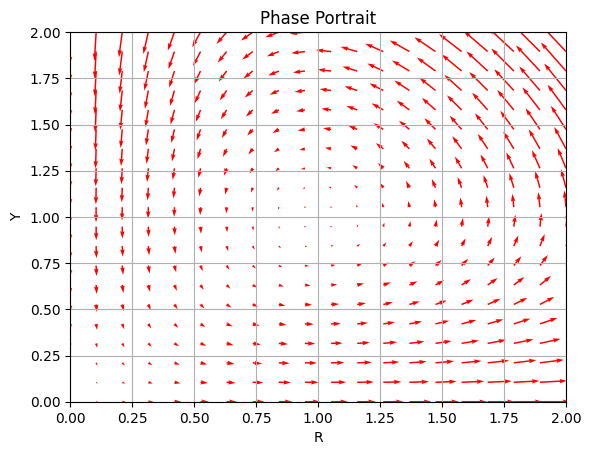

In [ ]:
# plot Phase Portrait

import matplotlib.pyplot as plt

# Parameters
a_val = 1.0
k_val = 1.0
c_val = 1.0

# Create a grid of (R, Y) values
R = np.linspace(0, 2, 20)
Y = np.linspace(0, 2, 20)
R, Y = np.meshgrid(R, Y)

# Compute the derivatives
dR, dY = lv_system([R, Y], 0, a_val, k_val, c_val)

# Normalize the arrows
m = (np.hypot(dR, dY)).mean()
if m != 0:
    dR /= m
    dY /= m

# Plot the phase portrait
plt.quiver(R, Y, dR, dY, color='r')
plt.xlabel('R')
plt.ylabel('Y')
plt.title('Phase Portrait')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid()
plt.show()

### Task 3: Adapt the model (Optional)

1. Given the base model, change it to include a new concept, e.g., consumers, multiple resources, etc.
2. Make a new phase portrait for the adapted model.
3. Describe how the changes affect the dynamics of the system.

In [51]:
#add global competition with a stochastic term

#2 producers, linear resource depletion, eternal competition


def lv_system(x, k_x, k_y, a, c, p_max):
    pt = p_max - k_x * x[0]  - k_y * x[1]
    dx0_dt = - a * x[0] + k_x * x[0] * (p_max - k_y * x[1] - k_x * x[0])
    dy0_dt = - c * x[1] + k_y * y[1] * (p_max - k_x * x[0] - k_y * x[1])

    return [dx0_dt, dy0_dt, pt]

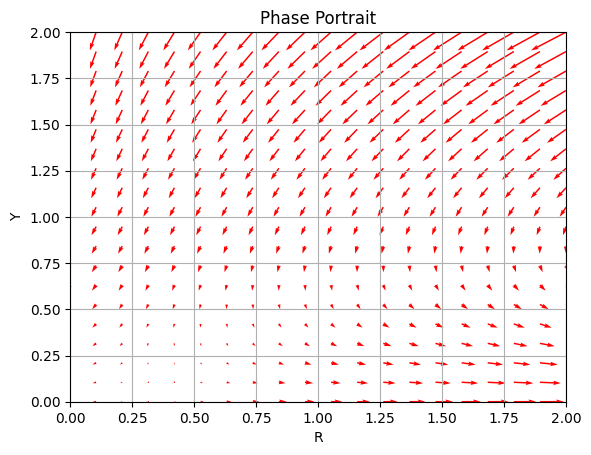

In [55]:
# plot Phase Portrait

import matplotlib.pyplot as plt

# Parameters
a_val = 1.0
c_val = 1.0
k_x_val = 1.0
k_y_val = 1.0
p_max_val = 3.0
sigma_val = 0.1

# Create a grid of (R, Y) values
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)
X, Y  = np.meshgrid(x,y)

# Compute the derivatives
dX, dY, pt = lv_system([X, Y], 0, a_val, k_x_val, c_val, sigma_val)

# Normalize the arrows
m = (np.hypot(dX, dY)).mean()
if m != 0:
    dX /= m
    dY /= m

# Plot the phase portrait
plt.quiver(R, Y, dR, dY, color='r')
plt.xlabel('R')
plt.ylabel('Y')
plt.title('Phase Portrait')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid()
plt.show()